# KRA Customer Segmentation

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.impute import KNNImputer
import warnings

In [2]:
df=pd.read_csv('kenyan_taxpayer_segmentation_data.csv')
df.head()  

,Taxpayer_ID,Age,Gender,Region,Marital_Status,Number_of_Dependants,Annual_Gross_Income (KES),Total_Tax_Paid (KES),Source_of_Income_Raw,Business_Sector,Tax_Compliance_Score,Compliance_Window_Deviation,Effective_Tax_Rate
0,A786579303X,69.0,Male,Kisumu,Single,5,3.379900e+05,10654.836532,Rental,Service (Consultancy),1,2,3.152412
1,A219540831X,32.0,Male,Kisumu,Single,7,1.226257e+05,7731.336589,Employment (PAYE),Manufacturing,2,2,6.304824
2,A126855092X,78.0,Male,Nairobi,Married,2,1.671357e+06,351253.801195,Employment (PAYE),Tech/IT,4,17,21.016081
3,A896233790X,38.0,Male,Rural_SemiArid,Married,5,9.729017e+04,6133.974197,Business (Sole Proprietor),Manufacturing,2,4,6.304824
4,A395310485X,41.0,Female,Rural_Uplands,Married,6,1.582908e+05,9979.958373,Employment (PAYE),Tech/IT,2,1,6.304824


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Taxpayer_ID                  5000 non-null   object 
 1   Age                          4604 non-null   float64
 2   Gender                       4750 non-null   object 
 3   Region                       5000 non-null   object 
 4   Marital_Status               4500 non-null   object 
 5   Number_of_Dependants         5000 non-null   int64  
 6   Annual_Gross_Income (KES)    5000 non-null   float64
 7   Total_Tax_Paid (KES)         5000 non-null   float64
 8   Source_of_Income_Raw         5000 non-null   object 
 9   Business_Sector              5000 non-null   object 
 10  Tax_Compliance_Score         5000 non-null   int64  
 11  Compliance_Window_Deviation  5000 non-null   int64  
 12  Effective_Tax_Rate           5000 non-null   float64
dtypes: float64(4), int

### From the above output we can note that:
There are missing values in Age,Gender,and marital status

There are some categorical features in our dataframe


In [4]:
df.shape

(5000, 13)

### Exploratory Data Analysis

In [5]:
df.describe()

,Age,Number_of_Dependants,Annual_Gross_Income (KES),Total_Tax_Paid (KES),Tax_Compliance_Score,Compliance_Window_Deviation,Effective_Tax_Rate
count,4604.000000,5000.000000,5.000000e+03,5.000000e+03,5000.00000,5000.000000,5000.000000
mean,51.354040,3.519800,1.011356e+06,1.405399e+05,3.00660,4.386400,11.895375
std,20.660445,2.281019,7.079616e+06,5.998802e+05,1.42568,6.194479,6.877149
min,-5.000000,0.000000,8.250442e+02,5.686378e+01,1.00000,0.000000,0.001480
25%,34.000000,2.000000,9.547619e+04,7.175568e+03,2.00000,1.000000,6.304824
50%,51.000000,4.000000,2.672539e+05,2.349044e+04,3.00000,3.000000,10.508040
75%,68.000000,6.000000,7.536756e+05,1.005666e+05,4.00000,5.000000,15.762060
max,150.000000,7.000000,2.833890e+08,2.503876e+07,5.00000,200.000000,31.524121


In [6]:
bad_age_rows = df[df['Age'] == -5]
print(bad_age_rows)
print("Total count:", len(bad_age_rows))

      Taxpayer_ID  Age  Gender          Region Marital_Status  \
333   A154318806X -5.0  Female          Kiambu        Married   
668   A282204745X -5.0    Male   Rural_Uplands         Single   
1012  A118514813X -5.0     NaN          Kiambu        Married   
1233  A294872482X -5.0  Female   Rural_Uplands        Married   
1234  A728492896X -5.0    Male          Kiambu        Married   
1754  A807491789X -5.0    Male          Nakuru         Single   
1803  A345343109X -5.0   Other        Machakos        Married   
2130  A285283722X -5.0  Female   Rural_Uplands        Married   
2155  A454002758X -5.0    Male          Kiambu        Married   
2829  A409883716X -5.0    Male         Nairobi         Single   
3004  A978726109X -5.0    Male   Rural_Uplands         Single   
3362  A354373770X -5.0  Female         Nairobi        Married   
4051  A759797724X -5.0    Male   Rural_Uplands            NaN   
4368  A276218805X -5.0    Male  Rural_SemiArid         Single   
4392  A949412096X -5.0   

df.describe() is a quick exploratory data analysis (EDA) method in Pandas that generates summary statistics for numerical (and optionally categorical) columns in a DataFrame. It provides key metrics like count, mean, standard deviation, minimum, maximum, and quartile values, helping you understand data distribution, detect outliers, and identify missing or skewed data early in the analysis process.

In [7]:
# Function to prepare data for Plotly bar plot
def get_counts_df(series, name):
    counts = series.value_counts().reset_index()
    counts.columns = [name, 'Count']
    # Ensures bars are sorted by count
    return counts.sort_values(by='Count', ascending=False)

# 1. Region Distribution
region_df = get_counts_df(df['Region'], 'Region')
fig1 = px.bar(
    region_df, 
    x='Region', 
    y='Count', 
    title='Distribution of Taxpayers by Region', 
    color='Count',
    color_continuous_scale=px.colors.sequential.Viridis
)
fig1.write_html("categorical_region_plotly.html")

# 2. Source of Income Distribution
income_df = get_counts_df(df['Source_of_Income_Raw'], 'Source_of_Income_Raw')
fig2 = px.bar(
    income_df, 
    x='Source_of_Income_Raw', 
    y='Count', 
    title='Distribution of Taxpayers by Source of Income',
    color='Count',
    color_continuous_scale=px.colors.sequential.Plasma
)
fig2.write_html("categorical_income_plotly.html")

# 3. Business Sector Distribution
sector_df = get_counts_df(df['Business_Sector'], 'Business_Sector')
fig3 = px.bar(
    sector_df, 
    x='Business_Sector', 
    y='Count', 
    title='Distribution of Taxpayers by Business Sector',
    color='Count',
    color_continuous_scale=px.colors.sequential.Inferno
)
fig3.write_html("categorical_sector_plotly.html")
fig1.show()
fig2.show()
fig3.show()


#### Categorical Plot Summaries

categorical_region: Nairobi is heavily dominant (>34%). Rural areas are split across two categories but are individually low-frequency.,Consider grouping low-frequency regions or using Target Encoding to manage high cardinality.


categorical_income: Employment (PAYE) and Business (Sole Proprietor) form the majority. Informal_Sector is a significant third segment.,"One-Hot Encoding is suitable here, as categories are mutually exclusive, but the features should be used to derive a segmentation label."


categorical_sector: Retail/Wholesale and Service dominate, but Unknown is the second largest category (>20%).","Must handle the Unknown category: either impute it based on other features (like income) or treat it as a distinct, important segment for model differentiation."

In [8]:

gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.pie(
    gender_counts,
    names='Gender',
    values='Count',
    title='Gender Distribution of Taxpayers',
    hole=0.0  # set to 0.4 for donut style
)
fig.show()



The taxpayer population shows a male-dominant distribution. Male taxpayers account for 54.1%, representing the largest portion of the taxpayer base. Female taxpayers make up 45.2%, showing strong but slightly lower participation. A very small fraction, approximately 0.7%, identify as other or unspecified categories.

Overall, the gender split suggests a relatively balanced representation, with a moderate male lead in tax registration or compliance activity.

In [9]:

gender_counts = df['Marital_Status'].value_counts().reset_index()
gender_counts.columns = ['Marital_Status', 'Count']

fig = px.pie(
    gender_counts,
    names='Marital_Status',
    values='Count',
    title='Marital_Status Distribution of Taxpayers',
    hole=0.0  # set to 0.4 for donut style
)
fig.show()

In [10]:



fig = px.histogram(
    df,
    x='Age',
    nbins=12,
    title='Age Distribution of Taxpayers',
    labels={'Age': 'Age of Taxpayers'},
)

fig.update_layout(
    bargap=0.05,
    xaxis_title="Age",
    yaxis_title="Number of Taxpayers"
)

fig.show()



### Numerical Plots


In [11]:

fig = px.histogram(
    df,
    x='Number_of_Dependants',
    nbins=10,
    title='Dependents Distribution of Taxpayers'
)

fig.update_layout(
    xaxis_title="Number of Dependents",
    yaxis_title="Number of Taxpayers"
)

fig.show()


Number of dependants


In [12]:

fig = px.scatter(
    df,
    x='Annual_Gross_Income (KES)',
    y='Total_Tax_Paid (KES)',
    title='Annual Gross Income vs Total Tax Paid (Log Scale)',
    labels={
        'Annual_Gross_Income (KES)': 'Annual Gross Income (KES)',
        'Total_Tax_Paid (KES)': 'Total Tax Paid (KES)'
    },
    hover_data=['Taxpayer_ID', 'Business_Sector', 'Region'],
    color='Business_Sector'
)

# Apply log scale
fig.update_layout(
    xaxis_type='log',
    yaxis_type='log',
    xaxis_title='Annual Gross Income (KES) [Log Scale]',
    yaxis_title='Total Tax Paid (KES) [Log Scale]'
)

fig.update_traces(marker=dict(size=8, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.show()



In [41]:
fig = px.histogram(
    df,
    x='Annual_Gross_Income (KES)',
    nbins=30,
    title='Distribution of Annual Gross Income',
    labels={'Annual_Gross_Income (KES)': 'Annual Gross Income (KES)'},
    marginal="box"  # optional: add box plot on top
)

fig.update_layout(
    xaxis_title="Annual Gross Income (KES)",
    yaxis_title="Number of Taxpayers"
)

fig.show()




In [14]:

corr = df.corr(numeric_only=True)
fig = px.imshow(
    corr,
    text_auto=True,
    title="Correlation Heatmap of Taxpayer Features",
    color_continuous_scale="Viridis"
)
fig.show()


Key Insights:

##### Annual Gross Income vs Total Tax Paid

Shows a strong positive correlation

This aligns with expected tax logic: higher income → higher tax paid

##### Effective Tax Rate vs Income

Displays a moderate positive correlation

Suggests tax rates tend to increase slightly as income rises (progressive tax structure)

##### Tax Compliance Score

Shows weak correlations with most financial and demographic factors

Indicates that compliance behavior may depend on non-financial features (e.g., behavior, enforcement interactions)

##### Number of Dependants

Shows minimal relationship with income or tax paid

Suggests dependent claims do not strongly influence gross income patterns

##### Age

Very weak correlations across the board

Implying no strong age-income or age-compliance trends in the sample

In [43]:
import plotly.express as px

# Identify only categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot frequency distribution for each categorical column
for col in categorical_cols:
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'Count']
    
    fig = px.bar(
        counts,
        x=col,
        y='Count',
        title=f"Distribution of {col}",
        text='Count'
    )
    
    fig.update_traces(textposition='outside')
    fig.update_layout(
        xaxis_title=col,
        yaxis_title="Count"
    )
    
    fig.show()


## Data cleaning & Preprocessing

In [16]:
df.isnull().sum()


Taxpayer_ID                      0
Age                            396
Gender                         250
Region                           0
Marital_Status                 500
Number_of_Dependants             0
Annual_Gross_Income (KES)        0
Total_Tax_Paid (KES)             0
Source_of_Income_Raw             0
Business_Sector                  0
Tax_Compliance_Score             0
Compliance_Window_Deviation      0
Effective_Tax_Rate               0
dtype: int64

In [17]:
# Drop rows where 'gender' is null
df = df[df['Gender'].notna()].reset_index(drop=True)

# Check how many rows remain
print(f"Remaining records: {len(df)}")
print(df['Gender'].isna().sum())  # Should be 0


Remaining records: 4750
0


What this does:

Removes all rows where gender is missing.

Resets the index so your DataFrame stays clean.

Ensures that downstream imputation/pipelines won’t break because of missing gender.

Imputation Using Predictive Models

You can treat missing marital status as a target variable and predict it using other features in your dataset. For example:

Logistic Regression (if binary: married/unmarried)

Random Forest / Decision Tree Classifier (if multiple categories: single, married, divorced, widowed)

k-Nearest Neighbors (KNN) (imputes based on similarity to other rows)

This usually works better than mode imputation because it uses relationships in the data rather than assuming all missing values are like the most frequent category.

In [18]:

# Make a copy of your dataframe
df1= df.copy()

# Select categorical columns to impute
categorical_cols = ['Marital_Status']

# Encode categorical columns to numbers
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Fit on non-null values to avoid errors
    df1[col] = le.fit_transform(df1[col].astype(str))
    le_dict[col] = le

# Apply KNN imputer
imputer = KNNImputer(n_neighbors=5)
df1[categorical_cols] = imputer.fit_transform(df1[categorical_cols])

# Decode back to original categories
for col in categorical_cols:
    le = le_dict[col]
    df1[col] = df1[col].round().astype(int)  # round because KNN outputs floats
    df1[col] = le.inverse_transform(df1[col])

# Verify missing values are imputed
print(df1[categorical_cols].isna().sum())
df1

Marital_Status    0
dtype: int64


,Taxpayer_ID,Age,Gender,Region,Marital_Status,Number_of_Dependants,Annual_Gross_Income (KES),Total_Tax_Paid (KES),Source_of_Income_Raw,Business_Sector,Tax_Compliance_Score,Compliance_Window_Deviation,Effective_Tax_Rate
0,A786579303X,69.0,Male,Kisumu,Single,5,3.379900e+05,10654.836532,Rental,Service (Consultancy),1,2,3.152412
1,A219540831X,32.0,Male,Kisumu,Single,7,1.226257e+05,7731.336589,Employment (PAYE),Manufacturing,2,2,6.304824
2,A126855092X,78.0,Male,Nairobi,Married,2,1.671357e+06,351253.801195,Employment (PAYE),Tech/IT,4,17,21.016081
3,A896233790X,38.0,Male,Rural_SemiArid,Married,5,9.729017e+04,6133.974197,Business (Sole Proprietor),Manufacturing,2,4,6.304824
4,A395310485X,41.0,Female,Rural_Uplands,Married,6,1.582908e+05,9979.958373,Employment (PAYE),Tech/IT,2,1,6.304824
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,A709329975X,37.0,Male,Rural_Uplands,Married,4,2.389556e+04,3766.432129,Employment (PAYE),Retail/Wholesale,5,6,15.762060
4746,A134770706X,81.0,Male,Nairobi,Married,4,3.327460e+05,41958.103118,Employment (PAYE),Tech/IT,4,9,12.609648
4747,A295508799X,33.0,Female,Nairobi,Single,3,1.643669e+04,2590.760485,Informal_Sector,Retail/Wholesale,5,6,15.762060
4748,A746809909X,68.0,Female,Nakuru,Married,0,1.441548e+06,75739.212893,Rental,Unknown,1,10,5.254020


We specify which categorical feature has missing values and needs imputation.

✔ Machine learning algorithms like KNN cannot work with text labels.
✔ LabelEncoder converts strings like:single 0,Married 1,Divorced 2.

✔ KNN finds the 5 closest similar rows to fill missing values.
✔ It imputes based on what similar individuals have for marital status.

✔ Because KNN outputs decimals → we round to nearest whole category
✔ Reverse encoding → convert numbers back into the original string values

In [19]:
df1.isnull().sum()

Taxpayer_ID                      0
Age                            381
Gender                           0
Region                           0
Marital_Status                   0
Number_of_Dependants             0
Annual_Gross_Income (KES)        0
Total_Tax_Paid (KES)             0
Source_of_Income_Raw             0
Business_Sector                  0
Tax_Compliance_Score             0
Compliance_Window_Deviation      0
Effective_Tax_Rate               0
dtype: int64

K-Nearest Neighbors (KNN) imputation fills missing values based on the similarity of a row to its nearest neighbors in the dataset. For each missing value, KNN identifies the k most similar rows using other features and imputes the value as the average (for numeric) or most frequent (for categorical) among those neighbors. This method leverages relationships between features, making it more robust than simple mean or mode imputation, especially for small datasets with structured patterns.

In [20]:
df1.shape  # number of rows


(4750, 13)

In [44]:
# Check how many missing values in Age
print("Missing Age values before imputation:", df1['Age'].isna().sum())

# Impute missing Age with median
median_age = df1['Age'].median()
df1['Age'] = df1['Age'].fillna(median_age)

# Verify that missing values are gone
print("Missing Age values after imputation:", df1['Age'].isna().sum())


Missing Age values before imputation: 0
Missing Age values after imputation: 0


What this does:

Computes the median of existing ages.

Fills all missing Age values with the median.

Ensures the Age column has no NaNs, so you can safely drop minors or use it in modeling.

In [22]:
# Count records with Age <= 18
num_minors = (df1['Age'] < 18).sum()

print("Number of records with Age <= 18:", num_minors)


Number of records with Age <= 18: 16


In [23]:
# Drop rows where age is 18 or below (by keeping those >= 18)
df1 = df1[df1['Age'] >= 18].reset_index(drop=True)

# Check the remaining records
print("Remaining records:", len(df1))


Remaining records: 4734


In [45]:
df1.isnull().sum()

Taxpayer_ID                    0
Age                            0
Gender                         0
Region                         0
Marital_Status                 0
Number_of_Dependants           0
Annual_Gross_Income (KES)      0
Total_Tax_Paid (KES)           0
Source_of_Income_Raw           0
Business_Sector                0
Tax_Compliance_Score           0
Compliance_Window_Deviation    0
Effective_Tax_Rate             0
dtype: int64

In [25]:
# Number of duplicate rows-Check if any record is duplicated
print("Number of duplicate rows:", df1.duplicated().sum())


Number of duplicate rows: 0


In [26]:
df1.head()

,Taxpayer_ID,Age,Gender,Region,Marital_Status,Number_of_Dependants,Annual_Gross_Income (KES),Total_Tax_Paid (KES),Source_of_Income_Raw,Business_Sector,Tax_Compliance_Score,Compliance_Window_Deviation,Effective_Tax_Rate
0,A786579303X,69.0,Male,Kisumu,Single,5,3.379900e+05,10654.836532,Rental,Service (Consultancy),1,2,3.152412
1,A219540831X,32.0,Male,Kisumu,Single,7,1.226257e+05,7731.336589,Employment (PAYE),Manufacturing,2,2,6.304824
2,A126855092X,78.0,Male,Nairobi,Married,2,1.671357e+06,351253.801195,Employment (PAYE),Tech/IT,4,17,21.016081
3,A896233790X,38.0,Male,Rural_SemiArid,Married,5,9.729017e+04,6133.974197,Business (Sole Proprietor),Manufacturing,2,4,6.304824
4,A395310485X,41.0,Female,Rural_Uplands,Married,6,1.582908e+05,9979.958373,Employment (PAYE),Tech/IT,2,1,6.304824


### Handling outliers

In [46]:
import numpy as np

# Identify numeric columns only
numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns

def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap values
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

    return df

# Apply IQR capping to all numeric features
for col in numeric_cols:
    df1 = cap_outliers_iqr(df1, col)

print("IQR capping complete.")




IQR capping complete.


### Encoding Categorical Columns

#### Label Encoding

Converts each category into a numeric label (e.g., Single → 0, Married → 1, Divorced → 2)

Pros:

Simple

Keeps column as single feature

Cons:

Introduces ordinal relationship (0 < 1 < 2) even if it doesn’t exist

Best for:

Tree-based models (Decision Tree, Random Forest, XGBoost)

Models that don’t assume linear relationships between features

#### One-Hot Encoding
Converts each category into a separate binary column
Pros:

No ordinal assumption

Works well for linear models (Logistic Regression, Linear Regression)

Cons:

Increases feature dimensionality

Best for:

Linear or distance-based models (Logistic Regression, KNN, SVM)

When number of categories is small

In [47]:

# Columns to one-hot encode
categorical_cols = ['Region', 'Marital_Status', 'Source_of_Income_Raw', 'Business_Sector','Gender']

# One-hot encode using pandas
df2 = pd.get_dummies(df1, columns=categorical_cols, drop_first=True)

# Check the new columns
print(df2.head())
print("New shape after encoding:", df2.shape)


   Taxpayer_ID   Age  Number_of_Dependants  Annual_Gross_Income (KES)  \
0  A786579303X  69.0                   5.0               3.379900e+05   
1  A219540831X  32.0                   7.0               1.226257e+05   
2  A126855092X  78.0                   2.0               1.671357e+06   
3  A896233790X  38.0                   5.0               9.729017e+04   
4  A395310485X  41.0                   6.0               1.582908e+05   

   Total_Tax_Paid (KES)  Tax_Compliance_Score  Compliance_Window_Deviation  \
0          10654.836532                   1.0                          2.0   
1           7731.336589                   2.0                          2.0   
2         232059.860608                   4.0                         11.0   
3           6133.974197                   2.0                          4.0   
4           9979.958373                   2.0                          1.0   

   Effective_Tax_Rate  Region_Kisumu  Region_Machakos  ...  \
0            3.152412         

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Taxpayer_ID                              4734 non-null   object 
 1   Age                                      4734 non-null   float64
 2   Number_of_Dependants                     4734 non-null   float64
 3   Annual_Gross_Income (KES)                4734 non-null   float64
 4   Total_Tax_Paid (KES)                     4734 non-null   float64
 5   Tax_Compliance_Score                     4734 non-null   float64
 6   Compliance_Window_Deviation              4734 non-null   float64
 7   Effective_Tax_Rate                       4734 non-null   float64
 8   Region_Kisumu                            4734 non-null   bool   
 9   Region_Machakos                          4734 non-null   bool   
 10  Region_Mombasa                           4734 no

In [49]:
df2.isna().sum()

Taxpayer_ID                                0
Age                                        0
Number_of_Dependants                       0
Annual_Gross_Income (KES)                  0
Total_Tax_Paid (KES)                       0
Tax_Compliance_Score                       0
Compliance_Window_Deviation                0
Effective_Tax_Rate                         0
Region_Kisumu                              0
Region_Machakos                            0
Region_Mombasa                             0
Region_Nairobi                             0
Region_Nakuru                              0
Region_Rural_SemiArid                      0
Region_Rural_Uplands                       0
Marital_Status_Married                     0
Marital_Status_Single                      0
Marital_Status_nan                         0
Source_of_Income_Raw_Dividends/Interest    0
Source_of_Income_Raw_Employment (PAYE)     0
Source_of_Income_Raw_Farming               0
Source_of_Income_Raw_Informal_Sector       0
Source_of_

In [50]:
from sklearn.preprocessing import StandardScaler

# Columns to scale (all except 'Taxpayer_id')
cols_to_scale = df2.drop(columns=['Taxpayer_ID']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

# Check the first few rows
print(df2.head())


   Taxpayer_ID       Age  Number_of_Dependants  Annual_Gross_Income (KES)  \
0  A786579303X  0.916382              0.640886                  -0.313333   
1  A219540831X -1.016282              1.517878                  -0.697240   
2  A126855092X  1.386489             -0.674602                   2.063522   
3  A896233790X -0.702877              0.640886                  -0.742403   
4  A395310485X -0.546175              1.079382                  -0.633664   

   Total_Tax_Paid (KES)  Tax_Compliance_Score  Compliance_Window_Deviation  \
0             -0.669053             -1.402133                    -0.547706   
1             -0.704867             -0.701362                    -0.547706   
2              2.043259              0.700178                     2.303657   
3             -0.724435             -0.701362                     0.085930   
4             -0.677320             -0.701362                    -0.864524   

   Effective_Tax_Rate  Region_Kisumu  Region_Machakos  ...  \
0     

StandardScaler

StandardScaler is a feature scaling technique that transforms numeric data so that each feature has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms — especially distance-based methods like K-Means, KNN, and PCA — are sensitive to the scale of features. Without scaling, features with larger numeric ranges can dominate the distance calculations and bias the model.

Importance:

Ensures all numeric features contribute equally

Improves convergence and performance of algorithms

Prevents dominance of features with large numeric ranges

Alternative options:

MinMaxScaler – scales features to a fixed range, usually 0 to 1. Useful when you want bounded values.

RobustScaler – scales features using median and interquartile range. Less sensitive to outliers.

MaxAbsScaler – scales features by their maximum absolute value. Useful for sparse data.

In [51]:

# Drop the Taxpayer_id column
df2 = df2.drop(columns=['Taxpayer_ID'])

# Verify the columns
print(df2.columns)



Index(['Age', 'Number_of_Dependants', 'Annual_Gross_Income (KES)',
       'Total_Tax_Paid (KES)', 'Tax_Compliance_Score',
       'Compliance_Window_Deviation', 'Effective_Tax_Rate', 'Region_Kisumu',
       'Region_Machakos', 'Region_Mombasa', 'Region_Nairobi', 'Region_Nakuru',
       'Region_Rural_SemiArid', 'Region_Rural_Uplands',
       'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_nan',
       'Source_of_Income_Raw_Dividends/Interest',
       'Source_of_Income_Raw_Employment (PAYE)',
       'Source_of_Income_Raw_Farming', 'Source_of_Income_Raw_Informal_Sector',
       'Source_of_Income_Raw_Rental', 'Business_Sector_Finance',
       'Business_Sector_Manufacturing', 'Business_Sector_Retail/Wholesale',
       'Business_Sector_Service (Consultancy)', 'Business_Sector_Tech/IT',
       'Business_Sector_Unknown', 'Gender_Male', 'Gender_Other'],
      dtype='object')


In [52]:

# Compute correlation matrix
corr_matrix = df2.corr()

# Create interactive heatmap with larger size
fig = px.imshow(
    corr_matrix,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    origin="upper",
    title="Correlation Matrix",
    width=1000,   # increase width
    height=800    # increase height
)

fig.show()


In [34]:

# List of numeric features (after encoding)
#numeric_cols = df2.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with KDE for each numeric feature
#for col in numeric_cols:
    #plt.figure(figsize=(8, 4))
    #sns.histplot(df2[col], kde=True, bins=30, color='skyblue')
    #plt.title(f'Distribution of {col}')
    #plt.xlabel(col)
    #plt.ylabel('Frequency')
    #plt.show()


## Clustering

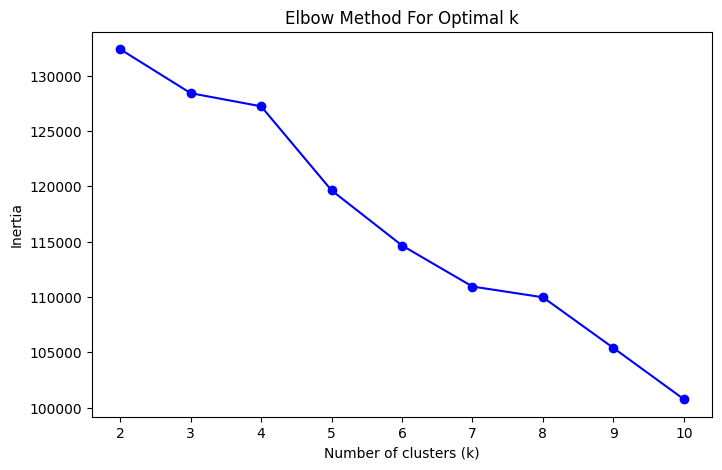

In [53]:
# Prepare data for clustering (exclude ID if present)
X = df2.copy()  # all scaled features

# Elbow method to find optimal k
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [54]:
df2.isna().sum()


Age                                        0
Number_of_Dependants                       0
Annual_Gross_Income (KES)                  0
Total_Tax_Paid (KES)                       0
Tax_Compliance_Score                       0
Compliance_Window_Deviation                0
Effective_Tax_Rate                         0
Region_Kisumu                              0
Region_Machakos                            0
Region_Mombasa                             0
Region_Nairobi                             0
Region_Nakuru                              0
Region_Rural_SemiArid                      0
Region_Rural_Uplands                       0
Marital_Status_Married                     0
Marital_Status_Single                      0
Marital_Status_nan                         0
Source_of_Income_Raw_Dividends/Interest    0
Source_of_Income_Raw_Employment (PAYE)     0
Source_of_Income_Raw_Farming               0
Source_of_Income_Raw_Informal_Sector       0
Source_of_Income_Raw_Rental                0
Business_S

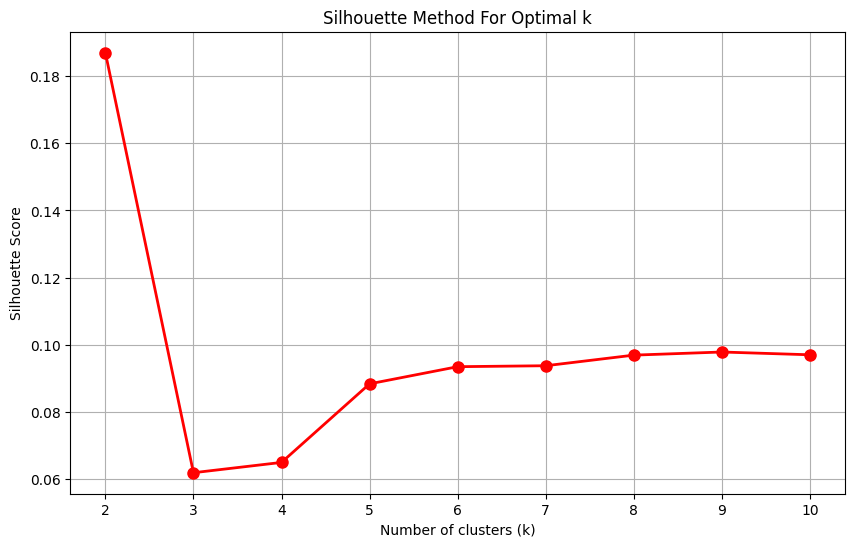

In [37]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

plt.figure(figsize=(10,6))
plt.plot(range(2,11), scores, 'ro-', markersize=8, linewidth=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.grid(True)
plt.show()


Cluster centers:
 [[ 3.64508643e-02  3.41482613e-03 -3.29247003e-01 -3.70011004e-01
  -6.29894721e-02  1.92032854e-02 -2.50255528e-01 -1.37755889e-01
  -1.35162893e-01 -2.09897854e-01 -4.66504632e-01 -2.59615218e-01
  -2.43282175e-01  1.94979212e+00  6.22038036e-02 -4.05326857e-02
  -5.03104676e-02  3.79082923e-02 -1.74457523e-03  1.25731318e-02
  -1.14732530e-02 -6.07466029e-03  1.34558963e+00 -6.41671425e-02
  -2.06636644e-01 -1.41483221e-01 -1.25603898e-01 -1.70146203e-01
  -3.62906555e-02 -2.20415949e-02]
 [-1.02815954e-03 -1.19638612e-02 -4.50828952e-01 -5.19063173e-01
  -1.33899440e-01  9.05766570e-03 -3.71575002e-01  2.77434132e-02
   1.26462361e-02  3.39318843e-02  8.20826948e-02  4.07105848e-02
   5.78449915e-02 -3.38628378e-01 -3.34880088e-04 -7.64001270e-03
   4.88962089e-03 -2.34057593e-02  6.29481674e-03  1.26361242e-02
  -9.91929648e-03  5.34605229e-03 -2.31094222e-01  1.59965789e-02
   3.19191383e-02  3.42562816e-02  1.98933135e-02  2.04606101e-02
   4.40724457e-03  5.65

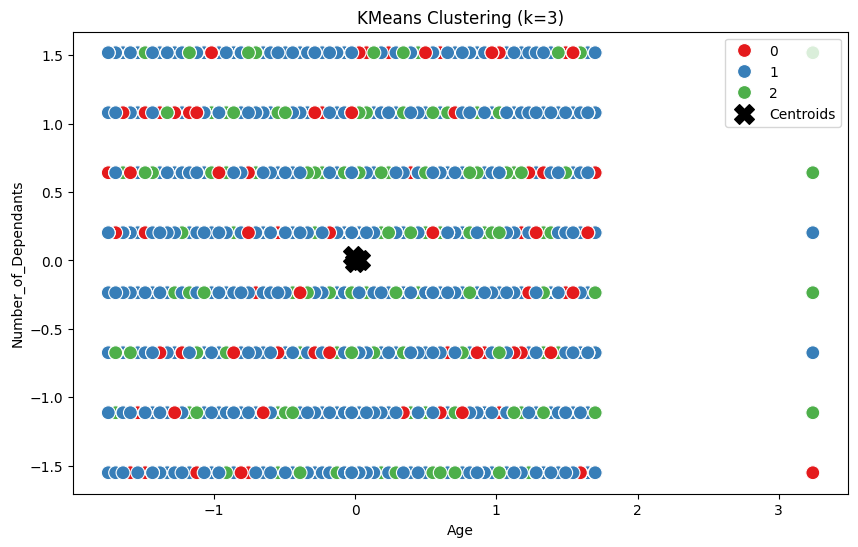

In [56]:


# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Add cluster labels to your dataframe
df1['Cluster'] = labels

# Inspect cluster centers
print("Cluster centers:\n", kmeans.cluster_centers_)

# Optional: Plot clusters using the first two features
plt.figure(figsize=(10,6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='black', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering (k=3)')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()


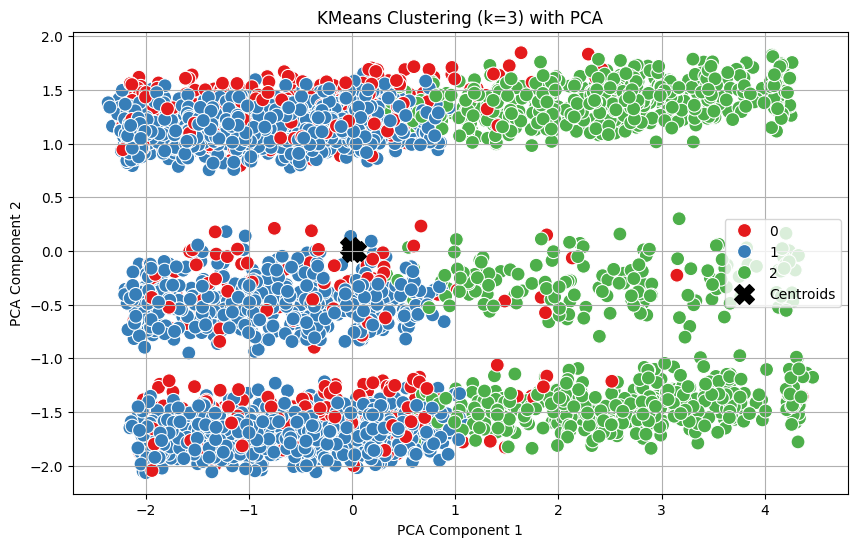

Explained variance ratio by the 2 PCA components: [0.08817251 0.05855457]


In [57]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
df1['Cluster'] = labels

# Reduce data to 2 principal components for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Plot clusters in 2D PCA space
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='black', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering (k=3) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Optional: explained variance by the two components
print("Explained variance ratio by the 2 PCA components:", pca.explained_variance_ratio_)
